In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Airports2.csv')

In [95]:
a = df[df['Origin_airport'] == 'YIP']['Seats'].count()
b = df[df['Destination_airport'] == 'YIP']['Seats'].count()
a+b

14460

In [91]:
freq = df['Origin_airport'].value_counts()
unique_fly = freq[freq == 1].index
# df.iloc[unique_fly]['Origin_airport']
freq[freq == max(freq)].index

Index(['ORD'], dtype='object')

In [25]:
df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [29]:
df.shape

(3606803, 15)

In [26]:
df.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.599849e+06,3.599849e+06,3.599996e+06,3.599996e+06
mean,2.688910e+03,4.048297e+03,3.722890e+01,6.973190e+02,5.871502e+06,5.897982e+06,3.775029e+01,-9.186178e+01,3.774091e+01,-9.183433e+01
std,4.347617e+03,6.200871e+03,4.961970e+01,6.044165e+02,7.858062e+06,7.906127e+06,5.765453e+00,1.653773e+01,5.736556e+00,1.647228e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.288700e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,1.090000e+02,1.560000e+02,2.000000e+00,2.730000e+02,1.030597e+06,1.025470e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.118000e+03,1.998000e+03,2.500000e+01,5.190000e+02,2.400193e+06,2.400193e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01
75%,3.503000e+03,5.370000e+03,5.500000e+01,9.270000e+02,8.613622e+06,8.635706e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [31]:
df.isna().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [12]:
df.columns

Index(['Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')

Numero di nodi (aeroporti): 727
Numero di archi (tratte): 36719


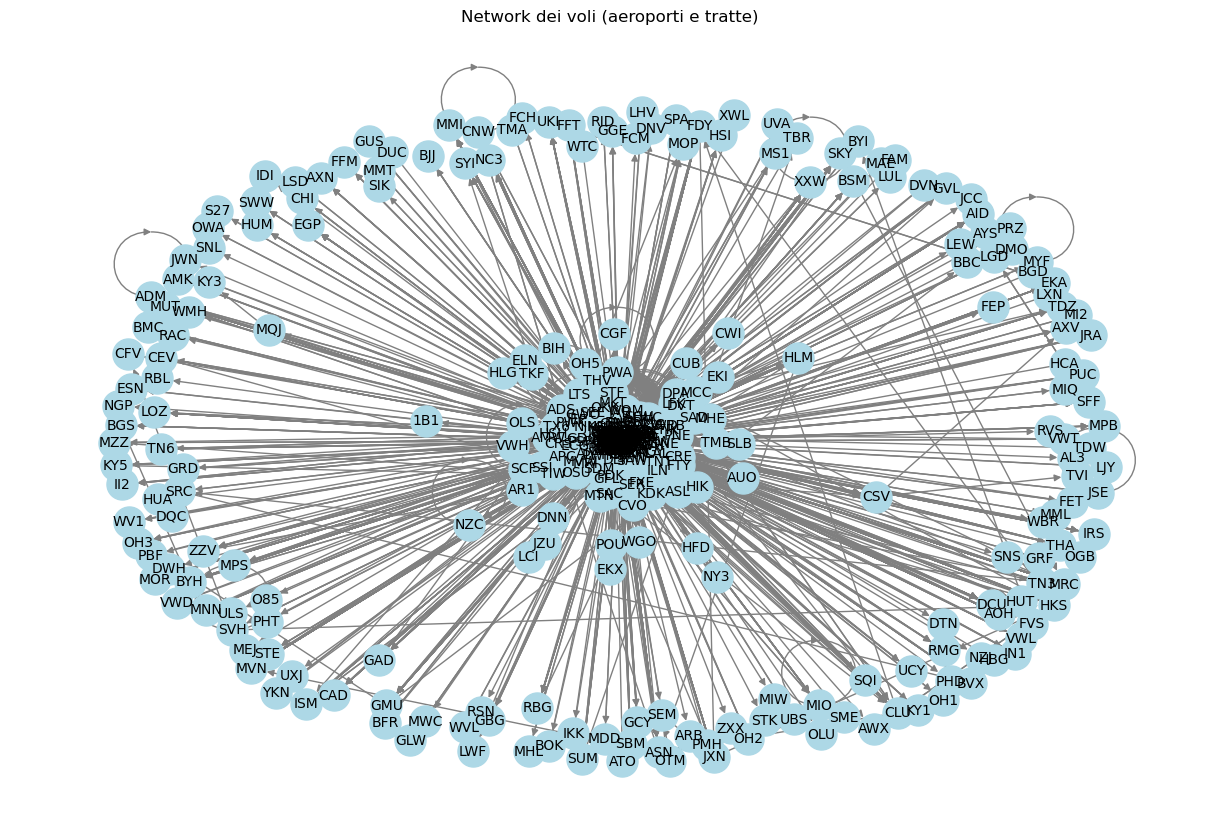

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G_dir = nx.DiGraph()

origin_airports = df['Origin_airport'].unique()
destination_airports = df['Destination_airport'].unique()
all_airports = set(origin_airports).union(destination_airports)

G_dir.add_nodes_from(all_airports)  # Aggiungi tutti gli aeroporti come nodi

# Gli archi rappresentano le tratte (Origin_airport -> Destination_airport)
treated_edges = df.groupby(['Origin_airport', 'Destination_airport'])['Passengers'].sum().reset_index()
for row in treated_edges.itertuples(index=False):
    origin = row.Origin_airport
    destination = row.Destination_airport
    passengers = row.Passengers
    G_dir.add_edge(origin, destination, weight=passengers)  # Aggiungi l'arco con il peso


# 4. Visualizza alcune informazioni sul grafo
print(f"Numero di nodi (aeroporti): {G_dir.number_of_nodes()}")
print(f"Numero di archi (tratte): {G_dir.number_of_edges()}")


# 5. Visualizza il grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_dir, k=0.15)  # Disposizione dei nodi
nx.draw(
    G_dir,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    edge_color="gray",
    font_size=10,
)
plt.title("Network dei voli (aeroporti e tratte)")
plt.show()

Numero di nodi (aeroporti): 727
Numero di archi (tratte): 23260


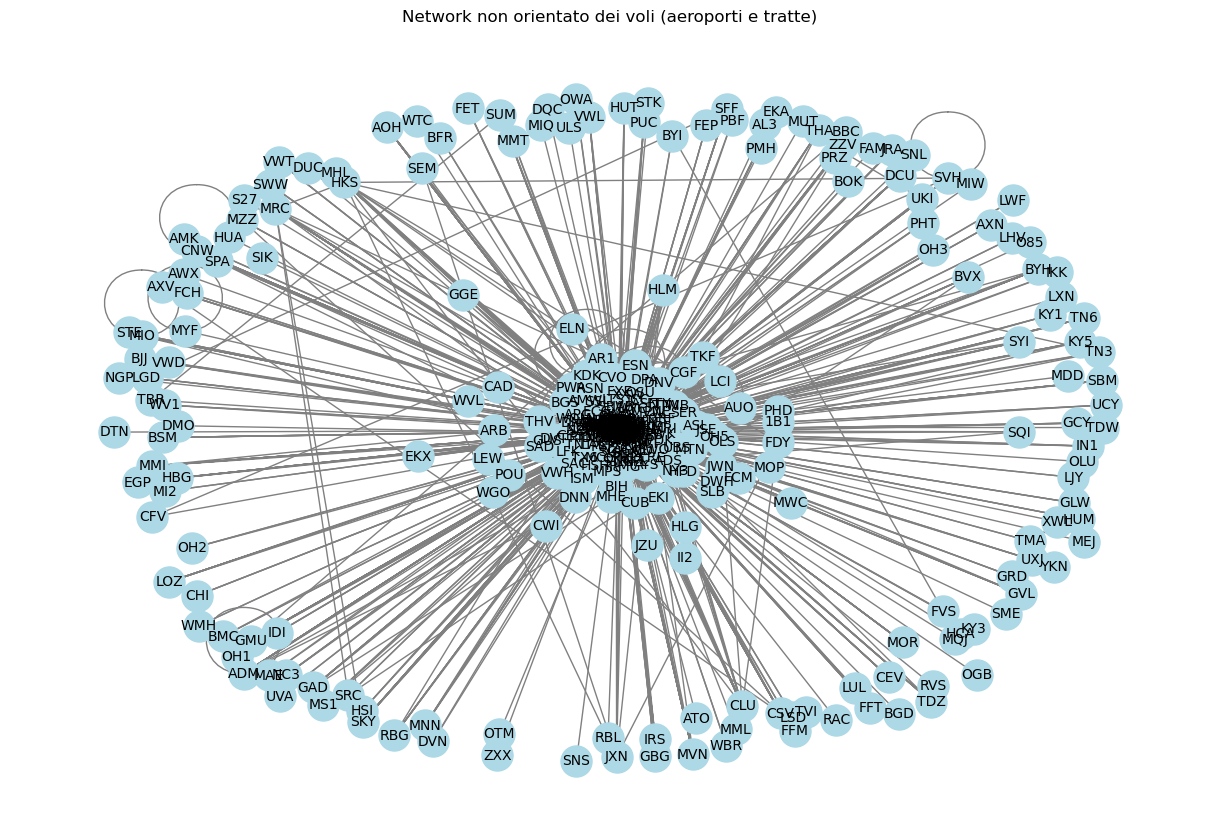

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Crea un grafo non orientato
G_no_dir = nx.Graph()  # Cambiato da DiGraph a Graph

# 2. Raccogli tutti gli aeroporti (nodi)
origin_airports = df['Origin_airport'].unique()
destination_airports = df['Destination_airport'].unique()
all_airports = set(origin_airports).union(destination_airports)

G_no_dir.add_nodes_from(all_airports)  # Aggiungi tutti gli aeroporti come nodi

# 3. Calcola i pesi delle tratte (archi)
treated_edges = df.groupby(['Origin_airport', 'Destination_airport'])['Passengers'].sum().reset_index()
for row in treated_edges.itertuples(index=False):
    origin = row.Origin_airport
    destination = row.Destination_airport
    passengers = row.Passengers

    # Se l'arco esiste già, somma i pesi
    if G_no_dir.has_edge(origin, destination):
        G_no_dir[origin][destination]['weight'] += passengers
    else:
        G_no_dir.add_edge(origin, destination, weight=passengers)  # Aggiungi l'arco con il peso

# 4. Visualizza alcune informazioni sul grafo
print(f"Numero di nodi (aeroporti): {G_no_dir.number_of_nodes()}")
print(f"Numero di archi (tratte): {G_no_dir.number_of_edges()}")

# 5. Visualizza il grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_no_dir, k=0.15)  # Disposizione dei nodi
nx.draw(
    G_no_dir,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    edge_color="gray",
    font_size=10,
)
plt.title("Network non orientato dei voli (aeroporti e tratte)")
plt.show()

In [16]:
print(G)

DiGraph with 727 nodes and 36719 edges


# 3

In [4]:
from collections import defaultdict, deque

def calculate_betweenness_centrality(graph):
    """
    Calculate the betweenness centrality for all nodes in a graph.
    
    :param graph: Dictionary representing the graph {node: [list_of_neighbors]}.
    :return: Dictionary {node: betweenness_centrality}.
    """
    # Initialize betweenness centrality to zero for all nodes
    betweenness = {node: 0 for node in graph}

    # Iterate through each node in the graph as the source
    for source in graph:
        # Step 1: Find all shortest paths from 'source' using BFS
        stack = []  # Keeps track of the order in which nodes are explored
        paths = defaultdict(list)  # Stores all shortest paths to each node
        paths[source] = [[source]]  # Initial path from the source node to itself
        queue = deque([source])  # BFS queue
        distances = {node: float('inf') for node in graph}  # Distance from source to each node
        distances[source] = 0  # Distance to source itself is zero

        # BFS to calculate shortest paths
        while queue:
            current = queue.popleft()  # Get the next node from the queue
            stack.append(current)  # Add the node to the stack for dependency calculation

            # Explore all neighbors of the current node
            for neighbor in graph[current]:
                # If the neighbor has not been visited, update its distance and add it to the queue
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)

                # If the neighbor is at the same shortest distance, add the new paths
                if distances[neighbor] == distances[current] + 1:
                    paths[neighbor].extend([path + [neighbor] for path in paths[current]])

        # Step 2: Compute dependency scores for the nodes
        dependency = {node: 0 for node in graph}

        # Process nodes in reverse order of their exploration
        while stack:
            node = stack.pop()  # Get the node from the stack
            for pred in paths[node]:
                if len(pred) > 1:  # Skip the source node itself
                    parent = pred[-2]  # Get the parent node
                    dependency[parent] += (1 + dependency[node]) / len(paths[node])

            # Update the betweenness centrality for the current node
            if node != source:
                betweenness[node] += dependency[node]

    # Normalize the betweenness centrality for undirected graphs
    normalization = 1 / ((len(graph) - 1) * (len(graph) - 2))
    for node in betweenness:
        betweenness[node] *= normalization

    return betweenness

In [5]:
betweenness_centr = calculate_betweenness_centrality(G)

In [6]:
import matplotlib.pyplot as plt

def plot_top_metric(betweenness_centrality, metric, top_n=20):
    """
    Plots the distribution of the top N nodes by betweenness centrality.
    
    :param betweenness_centrality: Dictionary {node: betweenness_centrality}.
    :param top_n: Number of top nodes to include in the histogram.
    """
    # Sort nodes by the metric in descending order
    sorted_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    
    # Select the top N nodes
    top_nodes = sorted_centrality[:top_n]
    
    # Extract node names and their centrality values
    nodes = [node for node, centrality in top_nodes]
    centrality_values = [centrality for node, centrality in top_nodes]
    
    # Plot the histogram
    plt.figure(figsize=(12, 6))
    plt.bar(nodes, centrality_values, color='skyblue')
    plt.xlabel("Airports (Nodes)", fontsize=14)
    plt.ylabel(f'{metric}', fontsize=14)
    plt.title(f"Top {top_n} Airports by {metric}", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

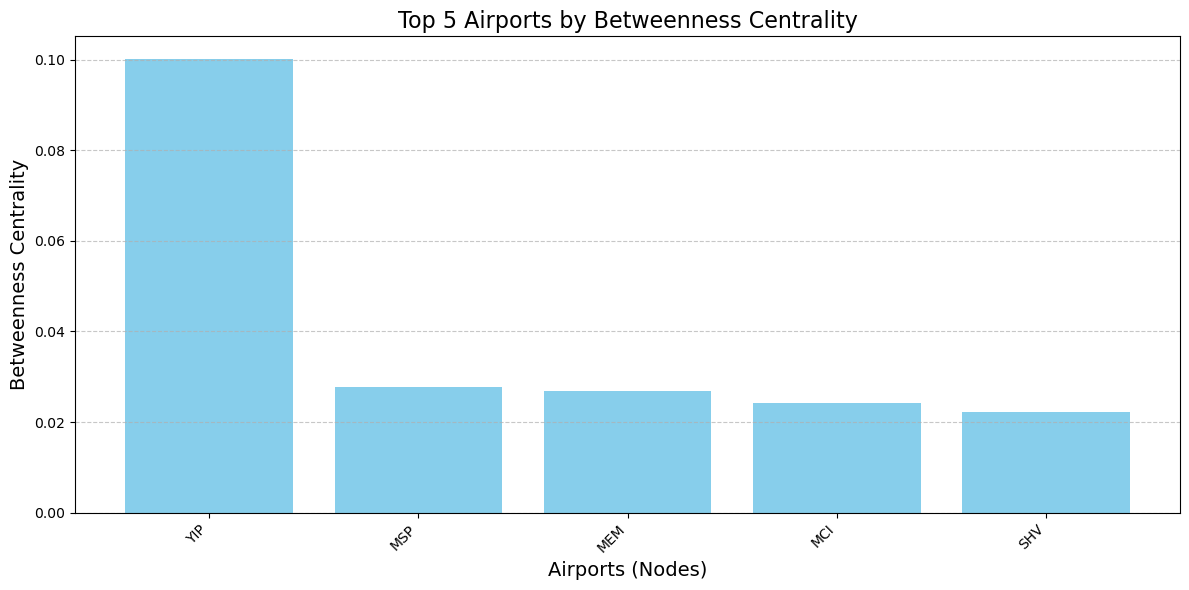

In [7]:
plot_top_metric(betweenness_centr, 'Betweenness Centrality', top_n = 5)

In [8]:
def calculate_closeness_centrality(graph):
    """
    Calculate the closeness centrality for all nodes in a directed graph.
    The distance is measured as the number of hops (shortest paths) to each other node.
    
    :param graph: Dictionary representing the directed graph {node: [list_of_neighbors]}.
    :return: Dictionary {node: closeness_centrality}.
    """
    closeness = {}

    for source in graph:
        # Step 1: Perform BFS to find shortest paths from 'source'
        distances = {node: float('inf') for node in graph}
        distances[source] = 0
        queue = deque([source])

        while queue:
            current = queue.popleft()

            for neighbor in graph[current]:
                # If neighbor hasn't been visited, update its distance and add it to the queue
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)

        # Step 2: Compute closeness centrality
        reachable_nodes = [dist for dist in distances.values() if dist != float('inf')]
        total_distance = sum(reachable_nodes)

        if total_distance > 0 and len(reachable_nodes) > 2:
            closeness[source] = (len(reachable_nodes) - 1) / total_distance
        else:
            closeness[source] = 0  # Centrality is 0 if the node is isolated or no paths exist

    return closeness

In [9]:
closeness_centrality = calculate_closeness_centrality(G)


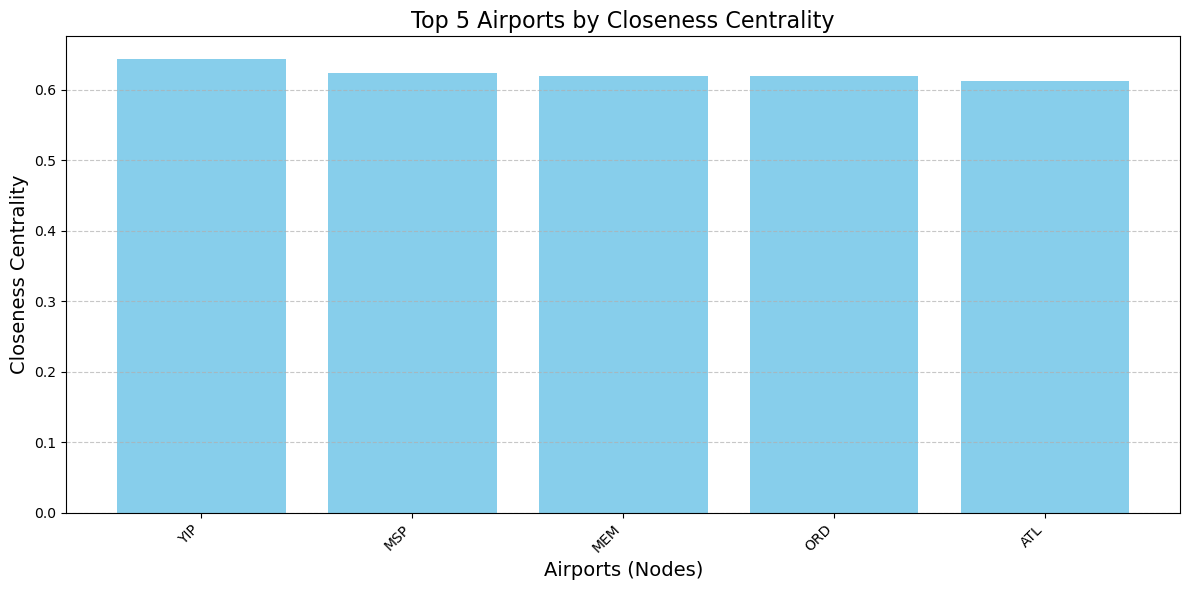

In [10]:
plot_top_metric(closeness_centrality, 'Closeness Centrality', top_n= 5)

In [11]:
def numbers_neighbors(graph):
    """
    Calculate the out-degree (number of outgoing neighbors) for each node in a directed graph.

    :param graph: A directed graph (DiGraph object).
    :return: Dictionary {node: number_of_outgoing_neighbors}.
    """
    neighbors = {}
    for node in graph.nodes: 
        neighbors[node] = len(list(graph.successors(node)))
    
    return neighbors


In [12]:
degree_centrality = numbers_neighbors(G)

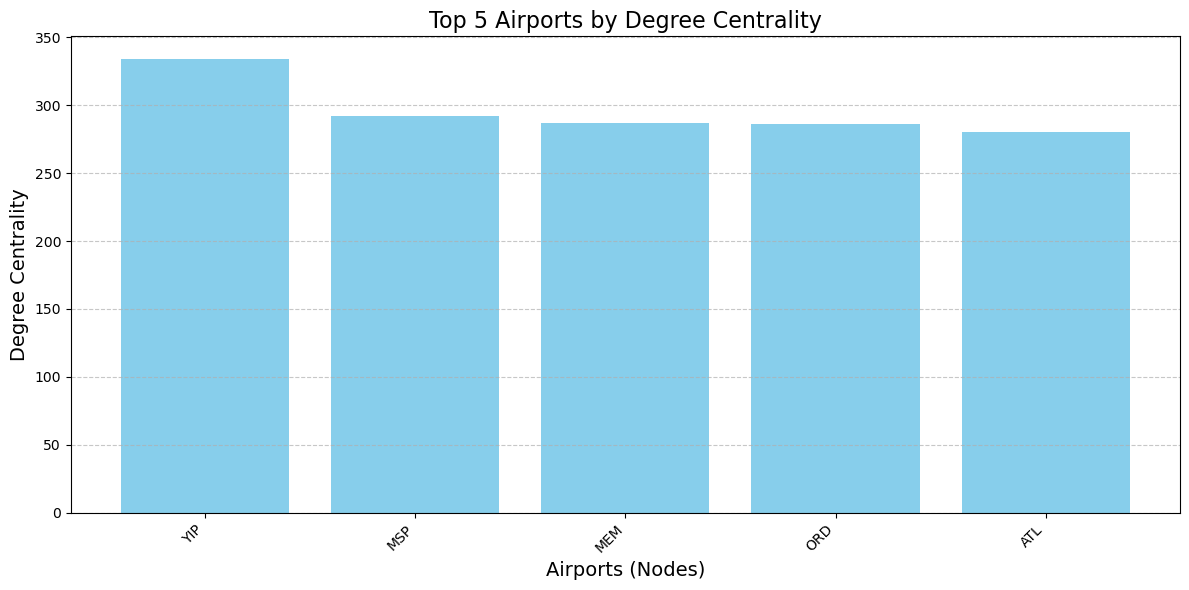

In [13]:
plot_top_metric(degree_centrality, 'Degree Centrality', top_n=5)

I'll use as weights the number of passengers for the moment, i'm not sure it's correct, but for PageRank makes sense, for the other 3 metrics not so much, for this reason i computed them without considering the weights.

In [14]:
def calculate_pagerank(graph, damping=0.85, max_iterations=100, tol=1.0e-6):
    """
    Compute the weighted PageRank of nodes in a directed, weighted graph.

    :param graph: Directed, weighted graph (networkx.DiGraph).
    :param damping: Damping factor (probability of following links, usually 0.85).
    :param max_iterations: Maximum number of iterations.
    :param tol: Tolerance for convergence (difference threshold).
    :return: Dictionary {node: PageRank score}.
    """
    # Initialize PageRank to 1/N for all nodes
    num_nodes = len(graph)
    pagerank = {node: 1 / num_nodes for node in graph}

    # Handle dangling nodes (nodes with no outgoing edges)
    dangling_nodes = {node for node in graph if len(graph[node]) == 0}

    for _ in range(max_iterations):
        new_pagerank = {}
        # Compute the sum of dangling node contributions
        dangling_sum = damping * sum(pagerank[node] for node in dangling_nodes) / num_nodes

        for node in graph:
            # Start with the teleportation factor
            rank_sum = (1 - damping) / num_nodes + dangling_sum

            # Add contributions from neighbors (weighted by edge weights)
            for neighbor in graph.predecessors(node):  # Use predecessors for incoming edges
                weight = graph[neighbor][node].get("weight", 1)  # Get edge weight, default is 1
                total_weight = sum(graph[neighbor][n].get("weight", 1) for n in graph.successors(neighbor))
                if total_weight != 0:
                    rank_sum += damping * (pagerank[neighbor] * weight / total_weight)
                else:
                    pass
            new_pagerank[node] = rank_sum

        # Check for convergence
        diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in graph)
        if diff < tol:
            break

        pagerank = new_pagerank

    return pagerank

In [15]:
pageranks = calculate_pagerank(G)
pageranks

{'ISO': 0.0002347946643409576,
 'BIF': 0.0004647225389658018,
 'TUP': 0.00024264023169708477,
 'SJC': 0.0049892886651592494,
 'SRC': 0.00021777815973266786,
 'MS1': 0.00021777815973266786,
 'LSD': 0.00021777815973266786,
 'SAD': 0.00021777815973266786,
 'GPT': 0.0008670663299386045,
 'TSS': 0.00021799268197901574,
 'HLG': 0.00021777815973266786,
 'RBG': 0.00021777815973266786,
 'DMA': 0.0003253679331691196,
 'ILN': 0.00021778013938237258,
 'LAR': 0.0002954958973093625,
 'NFL': 0.00022676995909098725,
 'WMH': 0.00021777815973266786,
 'DHN': 0.00027537082106633654,
 'LBF': 0.0003921691225138074,
 'NZC': 0.00021779663024092385,
 'NZJ': 0.00023087061144567875,
 'FVS': 0.00021777815973266786,
 'MFR': 0.0004849845613589975,
 'BIH': 0.0002179274575213747,
 'AIY': 0.00021778416634359686,
 'MOR': 0.00021777815973266786,
 'GVL': 0.00021777815973266786,
 'TBN': 0.00022341367657560982,
 'HKY': 0.00021844949046698062,
 'PIA': 0.0005208657106871321,
 'RWI': 0.0002179610412536961,
 'ESF': 0.000230752

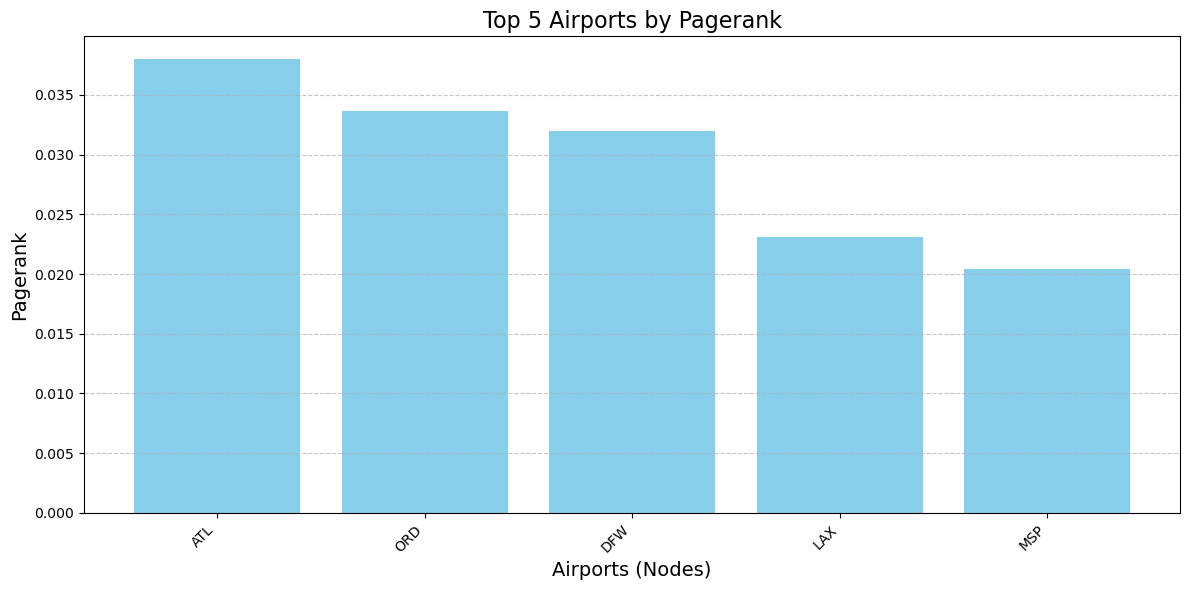

In [16]:
plot_top_metric(pageranks, 'Pagerank', top_n= 5 )

In [17]:
def analyze_centrality(betweenness_centr, closeness_centrality, degree_centrality, pageranks, airport):

    # Calculate centrality metrics
    betweenness = betweenness_centr[airport]
    closeness = closeness_centrality[airport]
    degree = degree_centrality[airport]
    pagerank = pageranks[airport]

    # organize metrics in a dataframe
    centrality_df = pd.DataFrame({
        'Airport': [airport],
        'Betweenness Centrality': [betweenness],
        'Closeness Centrality': [closeness],
        'Degree Centrality': [degree],
        'Pagerank': [pagerank]
    })
    return centrality_df

In [18]:
analyze_centrality(betweenness_centr, closeness_centrality, degree_centrality, pageranks, 'BOS')

,Airport,Betweenness Centrality,Closeness Centrality,Degree Centrality,Pagerank
0,BOS,0.012245,0.583815,228,0.012107


### LLM questions 

Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task. How can you check that the results given by the LLM are trustable?

#### Here are some alternative centrality measures that might be relevant for analyzing the airport network:

- Eigenvector Centrality:
    Measures how important a node is based on the importance of its neighbors.
    Particularly useful when certain airports are connected to other "high-rank" airports.

- Katz Centrality:
    Similar to Eigenvector Centrality, but assigns decreasing importance to connections further away.
    Useful for capturing the influence of airports that are not directly connected.

- Harmonic Centrality:
    A variation of Closeness Centrality that better handles disconnected graphs by calculating the reciprocal of the distance only for reachable nodes.
    Useful when the network contains isolated sub-networks.

- Flow Centrality:
    Measures how critical a node is in facilitating flows (e.g., passengers or goods) across the network.
    Relevant for analyzing how traffic moves through airports.

- Edge Betweenness Centrality:
    Calculates centrality for edges (connections) rather than nodes.
    Helps identify critical routes that, if removed, would disrupt traffic between regions of the network.

#### How to Check if the Results are Trustworthy

- Compare with Other Studies:
    Look for academic papers or reports related to the analysis of similar networks (transportation, infrastructure, etc.).
    Verify if the suggested measures align with those used in previous studies.

- Intuitive Analysis and Interpretation:
    Each centrality measure should have a clear interpretation in the context of the airport network. For example:
        Eigenvector Centrality should identify airports with highly strategic connections.
        Flow Centrality should highlight airports critical for passenger transit.

- Statistical Validation:
    Apply the new centrality measures to the network and compare the results with already computed ones (Betweenness, Closeness, Degree, PageRank).
    Check for significant correlations or differences:
        Compute correlation coefficients (e.g., Pearson or Spearman) between the centralities.

- Network Experiments:
    Remove nodes or edges with high centrality (according to the new measure) and observe the impact on network connectivity or capacity.
    If significant impacts are observed, it supports the relevance of the measure.

- Consult Domain Experts:
    Seek feedback from experts in airport networks or transportation to evaluate the validity of the suggested measures in a real-world context.

In [21]:
from collections import defaultdict

def calculate_flow_centrality(airport):
    """
    Calcola Flow Centrality per ogni nodo di un grafo.

    Args:
        G (dict): Un dizionario che rappresenta il grafo con nodi come chiavi e una lista di vicini come valori.
                  Es.: {'A': ['B', 'C'], 'B': ['A', 'C'], 'C': ['A', 'B', 'D'], ...}

    Returns:
        dict: Flow Centrality per ogni nodo.
    """
    # Funzione per calcolare i percorsi più brevi tra due nodi
    def shortest_paths(source, target, visited=None):
        if visited is None:
            visited = set()
        visited.add(source)
        if source == target:
            return [[source]]
        paths = []
        for neighbor in airport[source]:
            if neighbor not in visited:
                for path in shortest_paths(neighbor, target, visited.copy()):
                    paths.append([source] + path)
        return paths

    # Calcola Flow Centrality
    flow_centrality = defaultdict(int)
    nodes = list(airport.keys())  # Ottieni tutti i nodi dal grafo
    for source in nodes:
        for target in nodes:
            if source != target:
                paths = shortest_paths(source, target)
                if paths:  # Evita nodi non collegati
                    shortest_path = paths[0]  # Usa il primo percorso più breve trovato
                    for node in shortest_path[1:-1]:  # Escludi nodo iniziale e finale
                        flow_centrality[node] += 1

    return dict(flow_centrality)



# Calcola Flow Centrality per il grafo G
flow_centrality = calculate_flow_centrality(airport)
print("Flow Centrality:", flow_centrality)

NameError: name 'airport' is not defined

# 4

In [13]:
import numpy as np
import sys

# Funzione per convertire un grafo NetworkX in una matrice di adiacenza pesata
def convert_to_adjacency_matrix(graph):
    """Converte un grafo NetworkX in una matrice di adiacenza pesata."""
    nodes = list(graph.nodes)
    n = len(nodes)
    node_to_index = {node: i for i, node in enumerate(nodes)}
    adj_matrix = np.zeros((n, n))

    for u, v, data in graph.edges(data=True):
        i, j = node_to_index[u], node_to_index[v]
        weight = data.get('weight', 1)  # Peso predefinito = 1 se non specificato
        adj_matrix[i][j] = weight
        adj_matrix[j][i] = weight  # Simmetrico, perché il grafo è non orientato

    return adj_matrix, nodes

# Implementazione dell'algoritmo di Stoer-Wagner
def stoer_wagner(graph):
    """Implementazione dell'algoritmo di Stoer-Wagner per trovare il minimum cut."""
    n = len(graph)  # Numero di nodi
    min_cut_value = sys.maxsize  # Inizializza il valore del taglio minimo
    best_partition = None  # Salva la partizione migliore

    # Crea una lista di nodi per tener traccia della compressione
    nodes = list(range(n))

    # Itera finché ci sono almeno due nodi
    while len(nodes) > 1:
        # Step 1: Esegui una fase di taglio minimo
        cut_value, s, t = minimum_cut_phase(graph, nodes)

        # Step 2: Aggiorna il minimum cut
        if cut_value < min_cut_value:
            min_cut_value = cut_value
            best_partition = (nodes[:], [t])  # Salva le partizioni migliori

        # Step 3: Comprimi i nodi s e t
        merge_nodes(graph, s, t)

        # Rimuovi il nodo t (ora compresso)
        nodes.remove(t)

    return min_cut_value, best_partition

def minimum_cut_phase(graph, nodes):
    """Esegue una fase di taglio minimo e restituisce il valore del cut."""
    n = len(nodes)
    visited = [False] * n
    weights = [0] * n

    # Inizia dal primo nodo arbitrario
    prev_node = None
    current_index = 0

    for _ in range(n - 1):
        visited[current_index] = True
        max_weight = -1
        next_index = None

        # Aggiorna i pesi per i nodi non visitati
        for i in range(n):
            if not visited[i]:
                weights[i] += graph[nodes[current_index]][nodes[i]]
                if weights[i] > max_weight:
                    max_weight = weights[i]
                    next_index = i

        # Passa al prossimo nodo
        prev_node = current_index
        current_index = next_index

    # Restituisce il valore del taglio e i nodi s e t
    return weights[current_index], nodes[prev_node], nodes[current_index]

def merge_nodes(graph, s, t):
    """Comprime i nodi s e t nel grafo."""
    for i in range(len(graph)):
        graph[s][i] += graph[t][i]
        graph[i][s] += graph[i][t]
    for i in range(len(graph)):
        graph[t][i] = 0
        graph[i][t] = 0

# Esempio di utilizzo con il tuo grafo G_no_dir
def main():
    # Assumendo che G_no_dir sia il tuo grafo NetworkX non orientato
    adj_matrix, nodes = convert_to_adjacency_matrix(G_no_dir)

    # Esegui Stoer-Wagner sul grafo convertito
    min_cut_value, best_partition_indices = stoer_wagner(adj_matrix)

    # Converti gli indici in nodi reali
    partition1 = [nodes[i] for i in best_partition_indices[0]]
    partition2 = [nodes[i] for i in best_partition_indices[1]]

    # Stampa i risultati
    print("Minimum Cut Value:", min_cut_value)
    print("Partition 1 (Nodi):", partition1)
    print("Partition 2 (Nodi):", partition2)

# Esegui lo script
if __name__ == "__main__":
    main()

Minimum Cut Value: 0.0
Partition 1 (Nodi): ['AZA', 'TN3', 'SMF', 'RBG', 'DAL', 'AVL', 'KY3', 'PHT', 'LNK', 'JAN', 'BWG', 'IND', 'CAK', 'CGX', 'KTN', 'SBN', 'WMH', 'GFL', 'SBM', 'BTV', 'MLU', 'MHT', 'CRS', 'GRI', 'ORH', 'CWA', 'PRB', 'BFD', 'JBR', 'HGR', 'SHN', 'DSM', 'HKY', 'STE', 'JRB', 'MCO', 'ACY', 'ZXX', 'NZY', 'SBY', 'HVR', 'OKC', 'MIW', 'FMN', 'SRC', 'CPR', 'NFL', 'TN6', 'TSM', 'NZC', 'IPT', 'MMT', 'BTL', 'MDT', 'GTF', 'RIC', 'SFB', 'MKG', 'CRP', 'AOH', 'MEI', 'LFK', 'LSD', 'FYV', 'LKE', 'JFK', 'BGD', 'KY5', 'SZL', 'ALB', 'MCN', 'MGM', 'PAH', 'PBF', 'OFF', 'ROC', 'FLG', 'CAD', 'DQF', 'AGC', 'STF', 'GNV', 'NPA', 'TVI', 'BFR', 'GLW', 'SME', 'PDX', 'HUT', 'AUS', 'PGD', 'DNN', 'WV1', 'MHK', 'IRK', 'GLH', 'BPT', 'GRD', 'MGW', 'OGB', 'DLF', 'UKI', 'CVN', 'ROW', 'IDA', 'AOO', 'DVT', 'NIP', 'GMU', 'SLN', 'HBG', 'IAH', 'FWH', 'EKO', 'PNE', 'CEV', 'BJJ', 'OLM', 'UVA', 'CMH', 'EIL', 'ILM', 'MXF', 'BFI', 'ADM', 'RDU', 'HCA', 'FLO', 'SGF', 'SAT', 'BOS', 'SEA', 'SER', 'BDL', 'SVH', 'NZJ', 'PWM